Setup

In [1]:
import numpy as np
import matplotlib

matplotlib.use('TkAgg')

from universe import Universe
from animator import Animator
import pairwise
import barnes_hut

In [2]:
num_bodies = 200
size = 1
G = .001
dt = 0.01
softening = 0.05

universe = Universe(num_bodies, size, dt, G, softening, theta=0.5)

universe.initialise_bodies('random')

animator = Animator(universe, pairwise.calculate_accelerations_np)
animator.create_figure_for_animation()
animator.produce_animation(
    with_momentum_energy=True,
    draw_barnes_hut=False,
)

In [3]:
num_bodies_array = np.logspace(1,4,10,dtype=int)
times_pair = []
times_pair_np = []
times_barnes_hut = []

for i, num_bodies in enumerate(num_bodies_array):
    print(num_bodies)
    universe = Universe(num_bodies, size, dt, G, softening, theta=0.5)
    universe.initialise_bodies('random')

    if num_bodies < 1100:
        time_pair = %timeit -o pairwise.calculate_accelerations(universe.properties, universe.masses, universe.positions)
        times_pair.append(time_pair)
    time_pair_np = %timeit -o pairwise.calculate_accelerations_np(universe.properties, universe.masses, universe.positions)
    time_barnes_hut = %timeit -o barnes_hut.calculate_accelerations(universe.properties, universe.masses, universe.positions)
    print()

    times_pair_np.append(time_pair_np)
    times_barnes_hut.append(time_barnes_hut)

10
404 µs ± 2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
270 µs ± 7.75 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.34 ms ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

21
1.85 ms ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
586 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.95 ms ± 6.92 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

46
9.04 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.32 ms ± 22.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.9 ms ± 58.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

100
43 ms ± 356 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.19 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
39.9 ms ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

215
204 ms ± 8.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.01 ms ± 305 µs per loop (mean ± std. dev. of 7

In [4]:
times_pair_avg = [time.average for time in times_pair]
times_pair_std = [time.stdev for time in times_pair]
times_pair_np_avg = [time.average for time in times_pair_np]
times_pair_np_std = [time.stdev for time in times_pair_np]
times_barnes_hut_avg = [time.average for time in times_barnes_hut]
times_barnes_hut_std = [time.stdev for time in times_barnes_hut]

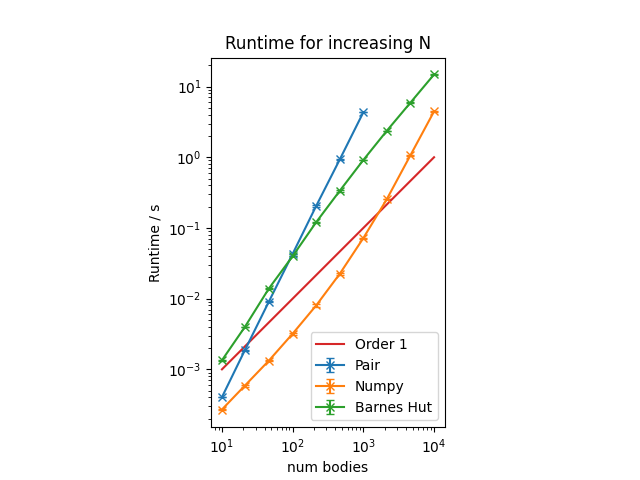

In [5]:
import matplotlib.pyplot as plt
%matplotlib widget

fig, ax = plt.subplots()

ax.errorbar(num_bodies_array[:len(times_pair_avg)], times_pair_avg, yerr=times_pair_std, fmt='x-', capsize=3, label='Pair')
ax.errorbar(num_bodies_array, times_pair_np_avg, yerr=times_pair_np_std, fmt='x-', capsize=3, label='Numpy')
ax.errorbar(num_bodies_array, times_barnes_hut_avg, yerr=times_barnes_hut_std, fmt='x-', capsize=3, label='Barnes Hut')

ax.plot(num_bodies_array, (num_bodies_array**1) * 1e-4, label='Order 1')

ax.set_aspect('equal')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("num bodies")
ax.set_ylabel("Runtime / s")
ax.set_title("Runtime for increasing N")
ax.legend()

plt.show()